<a href="https://colab.research.google.com/github/HardeepSaggu/Movie-Recommendation-System-NLP/blob/master/Movie_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing necessary libraries and modules**

---

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading Datasets 

---

> The first dataset contains the following features:-

> * movie_id - A unique identifier for each movie.
> * cast - The name of lead and supporting actors.
> * crew - The name of Director, Editor, Composer, Writer etc.

> The second dataset has the following features:- 

> * budget - The budget in which the movie was made.
> * genre - The genre of the movie, Action, Comedy ,Thriller etc.
> * homepage - A link to the homepage of the movie.
> * id - This is infact the movie_id as in the first dataset.
> * keywords - The keywords or tags related to the movie.
> * original_language - The language in which the movie was made.
> * original_title - The title of the movie before translation or adaptation.
> * overview - A brief description of the movie.
> * popularity - A numeric quantity specifying the movie popularity.
> * production_companies - The production house of the movie.
> * production_countries - The country in which it was produced.
> * release_date - The date on which it was released.
> * revenue - The worldwide revenue generated by the movie.
> * runtime - The running time of the movie in minutes.
> * status - "Released" or "Rumored".
> * tagline - Movie's tagline.
> * title - Title of the movie.
> * vote_average -  average ratings the movie recieved.
> * vote_count - the count of votes recieved.



In [0]:
df1 = pd.read_csv('tmdb-movie-metadata/tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb-movie-metadata/tmdb_5000_movies.csv')

## Looking at starting rows of both dataframes to get idea what we are dealing with

---

In [0]:
df1.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


---

In [0]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Merging both datasets to one to combine everything into one main DataFrame using 'id' feature

---


> Let's join the two datasets on the 'id' column


In [0]:
df1.columns = ['id','title_x','cast','crew']
df2 = df2.merge(df1,on = 'id')
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_x,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


---

# I. Demographic Filtering 

---

> We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 
 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but   40 votes.
 So, I'll be using IMDB's weighted rating (wr) which is given as :-

> ![](https://image.ibb.co/jYWZp9/wr.png)
 where,
 * v is the number of votes for the movie;
 * m is the minimum votes required to be listed in the chart;
 * R is the average rating of the movie; And
 * C is the mean vote across the whole report

> We already have v(**vote_count**) and R (**vote_average**), C and m can be calculated as 

In [0]:
m = df2['vote_count'].quantile(0.9)
C = df2['vote_average'].mean()

 ## Defining IMDB Formula for calculating score of each movie 

---

In [0]:
def weight_average(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m))*R + (m/(v+m))*C

 ## Filtering Dataframe to get movies with vote count >= m (minimum votes required to appear on chart)

---

In [0]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

 ## Adding new feature 'score' according to IMDB formula to rank these movies rating wise

---

In [0]:
q_movies['score'] = q_movies.apply(weight_average , axis = 1)
q_movies.shape

(481, 24)

 ## Sorting According to 'Score' attribute and find top 10 IMDB rated movies

---

In [0]:
q_movies = q_movies.sort_values('score' , ascending = False)
q_movies[['title','score','vote_average','vote_count']].head(10)

,title,score,vote_average,vote_count
1881,The Shawshank Redemption,8.059258,8.5,8205
662,Fight Club,7.939256,8.3,9413
65,The Dark Knight,7.920020,8.2,12002
3232,Pulp Fiction,7.904645,8.3,8428
96,Inception,7.863239,8.1,13752
3337,The Godfather,7.851236,8.4,5893
95,Interstellar,7.809479,8.1,10867
809,Forrest Gump,7.803188,8.2,7927
329,The Lord of the Rings: The Return of the King,7.727243,8.1,8064
1990,The Empire Strikes Back,7.697884,8.2,5879


## To see top trending movies according to our given data we can sort these movies on popularity attribute

---

Text(0.5, 1.0, 'Popular Movies')

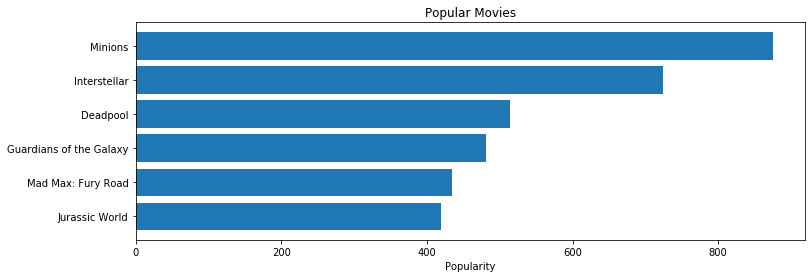

In [0]:
pop = df2.sort_values('popularity' , ascending = False)
plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['popularity'].head(6))
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

> Now something to keep in mind is that these demographic recommenders provide a general chart of recommended         movies to all the users. They are not sensitive to the interests and tastes of a particular user. This is when     we move on to a more refined system - Content Basesd Filtering.

# II. Content Based Filtering 

---

> In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Plot description based Recommender**

> I will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of the dataset.

> Term frequency is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF.

> This will give us a matrix where each column represents a word in the overview vocabulary (all the words that     appear in at least one document) and each column represents a movie, as before.This is done to reduce the           importance of words that occur frequently in plot overviews and therefore, their significance in computing the     final similarity score.

## Initializing TDF-IDF vectorizer object to generate TDF-IDF matrix of plots of movies

---

In [0]:
tfidf = TfidfVectorizer( stop_words='english' )
df2['overview'] = df2['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

## Finding similariites between each pair of movies with the help of Cosine - Similarity scores


----

> We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

> With this matrix in hand, we can now compute a similarity score - [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity).

> I will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
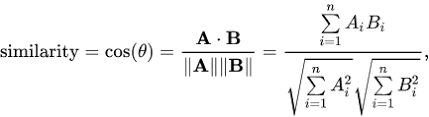

In [0]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(4803, 4803)

## Now to get recommendations one will input the movie title and our recommender will generate top 10 movies similar to the input movie based on similar plots or stories

---

In [0]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
def get_recommendations(title,cosine_sim = cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df2['title'].iloc[movie_indices]

## Testing our recommender System

---

In [0]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [0]:
get_recommendations('The Godfather')

2731     The Godfather: Part II
1873                 Blood Ties
867     The Godfather: Part III
3727                 Easy Money
3623                       Made
3125                     Eulogy
3896                   Sinister
4506            The Maid's Room
3783                        Joe
2244      The Cold Light of Day
Name: title, dtype: object

## Refining our recommender to give recommendations on the basis of credits, genres and keywords

---

> It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what I am going to do in this section. I am going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

> From the cast, crew and keywords features, I extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

### Our dataset contains values of credits, genres or keywords in the form of strings and not python objects like lists or dictionaries, so to convert them to python objects we use builtin function

In [0]:
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

## Function to get director's name of respective movies

---

In [0]:
def get_director(x):
    for i in x:
        if (i['job'] == 'Director'):
            return i['name']
    return np.nan

## Fuction to get list of 3 elements for each feature

---

In [0]:
def get_list(x):
    if (isinstance(x,list)):
        names = [i['name'] for i in x]
        if len(names) > 3:
            return names[:3]
        return names
    return []

## Redefining our features as per functions we made

---

In [0]:
df2['director'] = df2['crew'].apply(get_director)
features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

## Peeking at our modified dataset

---

In [0]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(5)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


## Now we convert all our dataset to lowecase and strip whitespaces in it so as to differentiate between "Johnny Depp" and "Johnny Dom"

---

In [0]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

## Cleaning our data for the extracted features

---

In [0]:
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

## Creating metadata soup which we want to feed to our vectorizer

---

In [0]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

## Vectorizing our features using CountVectorizer and generating the count matrix

---

In [0]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

## Finding the Cosine Similarity Scores just like before

---

In [0]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

## Resetting indices and mapping movie titles to indices

---

In [0]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

## Testing our recommender system

---

In [0]:
get_recommendations('The Godfather',cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

In [0]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

## Conclusion 

---


> I created recommenders using demographic and content - based filtering. While demographic filtering is very elemantary and cannot be used practically, Content based filtering is more advanced and powerful.
This model was very baseline and only provides a fundamental framework to start with.

> I would like to mention some excellent refereces that I learned from
1. [https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75](https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)
2. [https://www.kaggle.com/rounakbanik/movie-recommender-systems](https://www.kaggle.com/rounakbanik/movie-recommender-systems)
3. [http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf](http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf)